In [219]:
# Notebook to study the gammas emmited from the 2nubb events
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

import os
import sys
import tables as tb
import numpy  as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from matplotlib.colors import LogNorm  # Import LogNorm for logarithmic color scale
from matplotlib.cm import get_cmap

# Create a sequential colormap
cmap = get_cmap('Spectral')  # You can choose any sequential colormap here

plt.rcParams['figure.facecolor'] = 'w'

# plt.rcParams["font.size"] = 15
# plt.rcParams["figure.figsize"] = 11,9

## Load in the files and print info

In [203]:
# Loading in the files
files = []

mode = "esmeralda"

if (mode == "nexus"):
    files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_slim.h5") # LPR Port 1A event
else:
    files.append("../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim.h5") # LPR Port 1A event

print(files)

config_v = []
parts_v  = []
hits_v   = []
chits_v = []
 
for index, f in enumerate(files):
    
    if (mode == "nexus"):
        config_v.append(pd.read_hdf(f, 'config'))
    else:
        chits_v.append(pd.read_hdf(f, 'lt_chits'))

    
    parts_v .append(pd.read_hdf(f, 'parts'))
    hits_v  .append(pd.read_hdf(f, 'hits'))
    
if (mode == "nexus"):
    display(config_v[0])
else:
    # Divide the event numbers for the reco by two
    chits_v[0].event = chits_v[0].event//2 # Double slash is integer division
    
    display(chits_v[0])



['../data/nexus/LPR_Tl208_Ports/NEXT100_LPR_Tl208_PORT1a_esmeralda_slim.h5']


,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,443.175,209.925,0.0,0.0,164.372818,11.246377,1004.000000,-1,0.003422,-1,-1
1,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,209.925,0.0,0.0,165.400772,9.159420,297.411747,-1,0.001422,-1,-1
2,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,225.475,0.0,0.0,165.400772,7.072464,229.647060,-1,0.001345,-1,-1
3,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,443.175,209.925,0.0,0.0,165.400772,12.347826,400.941163,-1,0.001367,-1,-1
4,990000,1.980001e+12,0.0,434.069955,206.608199,1.0,427.625,209.925,0.0,0.0,166.434723,15.942029,668.091458,-1,0.003195,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1228,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,225.475,256.575,0.0,0.0,734.436340,6.144928,276.756342,-1,0.000939,-1,-1
1229,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,241.025,256.575,0.0,0.0,734.436340,7.130435,321.141804,-1,0.001099,-1,-1
1230,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,225.475,225.475,0.0,0.0,735.472168,6.086957,972.204556,-1,0.003269,-1,-1
1231,80338,1.606765e+11,1.0,227.391575,239.144270,1.0,241.025,241.025,0.0,0.0,735.472168,6.666667,1064.795444,-1,0.003645,-1,-1


In [216]:
## Particles
pd.set_option('display.max_rows', 20)  # Change 1000 to your desired maximum number
display(parts_v[0][parts_v[0].event_id == 990001])

# Get the MC scale factor
# This is equal to Data triggers over 400 keV/MC triggers over 400 keV. 
# Some example data trigger numbers available from https://arxiv.org/abs/1905.13110 
# Note this paper notes a trigger threshold of 150 keV and nexus uses 400 keV
# We should take that into account here too
scale_factor = 313761 / len(parts_v[0][parts_v[0].particle_name == "Tl208"].event_id.unique()) 
print("MC Scale Factor: ", scale_factor)


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
38,990001,1,Tl208,True,0,400.029755,395.959412,531.546570,0.000000,400.029755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,none,RadioactiveDecay
39,990001,4,e-,False,1,400.029755,395.959412,531.546570,0.000088,404.729065,...,0.731171,0.324509,-0.974949,0.000000,-0.000000,0.000000,0.849722,15.684104,RadioactiveDecay,eIoni
40,990001,3,anti_nu_e,False,1,400.029755,395.959412,531.546570,0.000088,2982.102539,...,0.072843,-0.363809,0.237816,0.072843,-0.363809,0.237816,0.440704,15621.654297,RadioactiveDecay,Transportation
41,990001,2,Pb208[3708.451],False,1,400.029755,395.959412,531.546570,0.000088,400.029755,...,-0.804014,0.039300,0.737132,-0.000000,0.000000,0.000000,0.000003,0.000000,RadioactiveDecay,RadioactiveDecay
42,990001,6,gamma,False,2,400.029755,395.959412,531.546570,0.000088,432.724762,...,0.687796,-0.716940,-0.457829,-0.000000,0.000000,-0.000000,1.093926,62.371548,RadioactiveDecay,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,990001,97,e-,False,47,-313.715302,-214.920929,701.131958,3.394992,-313.715424,...,-0.001478,0.008179,0.007836,-0.000000,0.000000,-0.000000,0.000128,0.000780,phot,eIoni
140,990001,96,e-,False,47,-313.715302,-214.920929,701.131958,3.394992,-313.705780,...,0.053483,-0.018631,-0.022106,-0.000000,0.000000,-0.000000,0.003604,0.041510,phot,eIoni
141,990001,95,e-,False,47,-313.715302,-214.920929,701.131958,3.394992,-314.211975,...,-0.077683,0.124207,-0.266735,0.000000,-0.000000,0.000000,0.083753,7.999376,phot,eIoni
142,990001,46,e-,False,27,-256.848145,-202.203995,723.870178,3.032504,-256.749023,...,0.033900,-0.011541,0.161690,-0.000000,-0.000000,-0.000000,0.026166,0.942146,eIoni,eIoni


91497
MC Scale Factor:  3.4291943998163874


#### Apply containment and sum the hits in the active volume energy

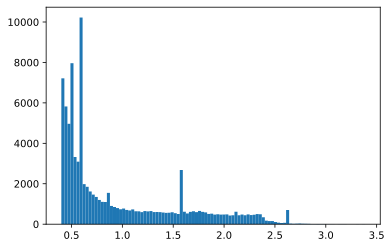

In [205]:
# Get the hit tables and plot the total energy deposited in the TPC
uncontained_hit_events = hits_v[0][hits_v[0].label != "ACTIVE"].event_id.unique()

hits_contained_df = hits_v[0][~hits_v[0].event_id.isin(uncontained_hit_events) ]

# Sum the energy of the hits and bin into a histogram
hit_tot_energy = hits_contained_df.groupby('event_id')['energy'].sum().reset_index(name='hit_tot_energy')

# Also merge this event energy into the main dataframe
# Merge the original DataFrame with the summed energy DataFrame based on 'event'
hits_contained_df = pd.merge(hits_contained_df, hit_tot_energy, on='event_id')
plt.figure()
plt.hist(hit_tot_energy.hit_tot_energy, bins = 100);



Double escape events

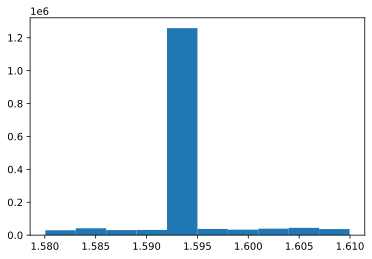

In [206]:
# Get the DE peak events
DE_hits = hits_contained_df[(hits_contained_df.hit_tot_energy > 1.58) & (hits_contained_df.hit_tot_energy < 1.61)  ]
DE_event_ids = DE_hits.event_id

plt.figure()
plt.hist(hits_contained_df[hits_contained_df.event_id.isin(DE_event_ids)].hit_tot_energy);

### Get all the gammas in the event and the bremsstrahlung 
- Also applies conainment requirement of the gammas 
- Applies 2 cm cut to the bremstrahlung (this accounts for voxelation, but not necissarily the diffusion yet)

In [207]:
# Plot the distance of the gammas and bin in a histogram
gammas = parts_v[0][parts_v[0]["particle_name"] == "gamma" ]

# Get all gammas that originate in the DE peak
gammas = gammas[gammas.event_id.isin(DE_event_ids) ]

# Create a table of bremstrahlung gammas
eBrem =  gammas[  (gammas["creator_proc"] == "eBrem")  ]

# Remove the events where there is a bremstahlung gamma that escapes the active
uncontained_brem_events = eBrem[ (eBrem.final_volume != "ACTIVE")].event_id.unique()

eBrem_contained = eBrem[~eBrem.event_id.isin(uncontained_brem_events) ]

# Apply a distance cut, so make sure the event has 1 bremstrahlung that travelled more than 3 cm
eBrem_contained_long_dist_evtid = eBrem[ (eBrem.length > 30)].event_id
eBrem_contained = eBrem_contained[eBrem_contained.event_id.isin(eBrem_contained_long_dist_evtid) ]

display(eBrem_contained)
# print(eBrem_contained.event_id.unique())

# Also get the other contained gammas in the event that are not direct bremsstrahlung
# Remove the events where there is a bremstahlung gamma that escapes the active
gammas_contained = gammas[ (gammas.final_volume == "ACTIVE")]
gammas_contained = gammas_contained[gammas_contained.creator_proc != "eBrem"]
gammas_contained = gammas_contained[gammas_contained.kin_energy < 0.6] # remove the annihilation gammas and the incident one
# gammas_contained = gammas_contained[ (gammas_contained.length > 20)]


# Remove rows that are bremsstrahlung
# gammas_contained = gammas_contained[gammas_contained.final_proc != "eBrem"]


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc
1620,990022,96,gamma,False,36,373.214630,282.993591,489.617249,0.404423,315.353455,...,-0.064578,-0.094276,0.004059,-0.0,-0.0,0.0,0.114345,102.452461,eBrem,phot
20985,990295,34,gamma,False,29,227.523804,-6.209955,1047.032349,3.069314,227.624863,...,0.001017,0.000788,-0.001076,0.0,0.0,-0.0,0.001677,0.166604,eBrem,phot
20999,990295,33,gamma,False,29,212.619537,8.882199,1049.478638,2.862942,212.656952,...,0.003753,-0.004284,-0.002945,0.0,-0.0,-0.0,0.006412,0.063914,eBrem,phot
21008,990295,32,gamma,False,29,187.663574,-24.544205,1019.999695,2.599148,242.919373,...,0.016665,0.014540,0.011988,0.0,0.0,0.0,0.025157,83.410103,eBrem,phot
21027,990295,108,gamma,False,28,256.996765,20.560570,982.402283,2.080668,257.251801,...,0.008742,-0.007170,-0.004306,0.0,-0.0,-0.0,0.012098,0.352942,eBrem,phot
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5583,980073,86,gamma,False,32,401.821075,30.972832,644.062500,1.315703,414.893433,...,0.006253,-0.003438,0.022883,0.0,-0.0,0.0,0.023970,50.113197,eBrem,phot
18958,980265,74,gamma,False,38,-226.589615,-294.163452,601.470276,3.505322,-189.886017,...,0.070314,0.010899,0.007875,0.0,0.0,0.0,0.071588,37.368679,eBrem,phot
11251,80170,63,gamma,False,27,-45.466633,273.098572,916.297302,2.553148,-45.461189,...,0.000157,-0.001371,0.000412,0.0,-0.0,0.0,0.001440,0.049833,eBrem,phot
11262,80170,59,gamma,False,27,-33.093231,273.302673,887.208191,2.128423,-66.791153,...,-0.034918,-0.049876,-0.041307,-0.0,-0.0,-0.0,0.073574,71.003159,eBrem,phot


#### Plot the MC true event
- Label bremstrahlung as green
- Label other gammas as red

,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc


,event_id,particle_id,particle_name,primary,mother_id,initial_x,initial_y,initial_z,initial_t,final_x,...,initial_momentum_x,initial_momentum_y,initial_momentum_z,final_momentum_x,final_momentum_y,final_momentum_z,kin_energy,length,creator_proc,final_proc


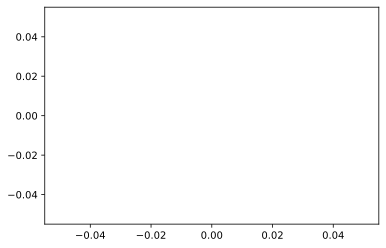

In [208]:
# Plot an event with brem
event = DE_hits[DE_hits.event_id == 80301]
event_brem = eBrem_contained[eBrem_contained.event_id == 80301 ]
event_gamma = gammas_contained[gammas_contained.event_id == 80301 ]

display(event_brem)
display(event_gamma)
# pd.set_option('display.max_rows', 115)  # Change 1000 to your desired maximum number
# display(parts_v[0][ (parts_v[0].event_id == 1620279)  ])

# display(event)
plt.figure()
plt.plot(event.x, event.y, ".")
plt.scatter(event_gamma.final_x,event_gamma.final_y, color = "g")
plt.scatter(event_brem.final_x,event_brem.final_y, color = "r")


#### Plot the energy of the visible bremsstrahlung vs the other gammas in the event

Text(0.5, 0, 'Gamma Energy [MeV]')

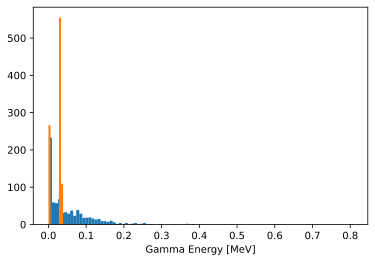

In [209]:
# Plot the energy of the visible brem vs all gammas in the event that are contained
# We must include a distance cut too
plt.figure()
plt.hist(eBrem_contained.kin_energy, bins = 100);
plt.hist(gammas_contained[gammas_contained.kin_energy < 0.5].kin_energy, bins = 50);
plt.xlabel("Gamma Energy [MeV]")
# plt.xlim(0, 0.01)

#### Lets now look at the reconstructed stuff

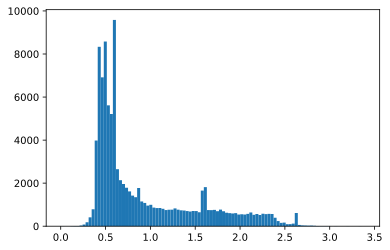

In [210]:
# Now lets plot the energy distribution of the esmeralda hits

# Sum the energy of the hits and bin into a histogram
chit_tot_energy = chits_v[0].groupby('event')['Ec'].sum().reset_index(name='hit_tot_energy')

plt.figure()
plt.hist(chit_tot_energy.hit_tot_energy, bins = 100);

,event,time,npeak,Xpeak,Ypeak,nsipm,X,Y,Xrms,Yrms,Z,Q,E,Qc,Ec,track_id,Ep
0,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,412.075,225.475,0.0,0.0,359.662628,5.449275,1109.000000,-1,0.004751,-1,-1
1,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,396.525,225.475,0.0,0.0,360.710083,6.898551,956.999939,-1,0.003578,-1,-1
2,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,396.525,225.475,0.0,0.0,361.747864,13.101449,573.150791,-1,0.002143,-1,-1
3,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,396.525,241.025,0.0,0.0,361.747864,6.782609,296.719655,-1,0.001176,-1,-1
4,990022,1.980046e+12,0.0,379.796942,232.021758,1.0,412.075,225.475,0.0,0.0,361.747864,7.478261,327.152455,-1,0.001402,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,80170,1.603410e+11,1.0,-35.224135,262.567733,1.0,7.775,256.575,0.0,0.0,926.580383,6.782609,627.231766,-1,0.002104,-1,-1
1040,80170,1.603410e+11,1.0,-35.224135,262.567733,1.0,7.775,272.125,0.0,0.0,926.580383,8.927536,825.587113,-1,0.002778,-1,-1
1041,80170,1.603410e+11,1.0,-35.224135,262.567733,1.0,-7.775,272.125,0.0,0.0,927.655151,5.391304,1371.045534,-1,0.004608,-1,-1
1042,80170,1.603410e+11,1.0,-35.224135,262.567733,1.0,7.775,303.225,0.0,0.0,927.655151,6.086957,1547.954588,-1,0.005236,-1,-1


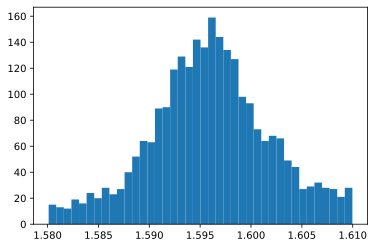

In [211]:
# Get the reco events in the DE peak
reco_DE_event_ids      = chit_tot_energy[(chit_tot_energy.hit_tot_energy > 1.58) & (chit_tot_energy.hit_tot_energy < 1.61)  ].event

reco_DE_events = chits_v[0][chits_v[0].event.isin(reco_DE_event_ids)]

# Also apply cut so that we look at events in the MC sample
reco_DE_events = chits_v[0][chits_v[0].event.isin(eBrem_contained.event_id.unique())] 

display(reco_DE_events)
# print(reco_DE_events.event.unique())

plt.figure()
plt.hist(chit_tot_energy[chit_tot_energy.event.isin(reco_DE_event_ids)].hit_tot_energy, bins = 40); # Energy resolution paper uses 1 keV bins


# Plot the visible bremstrahlung and their energy distribution in true 
- Define the visible bremsstrahlung as a brem with distance greater than 3 cm

In [224]:
bin_edges = np.arange(-0.5, 5.5, 1)
bin_centers = np.arange(0, 5, 1)

eventids = gammas.event_id.unique()

n_photon_v = []
E_brem = [] # Bremsstrahlung energies

E_gamma = [] # Gamma energies


for e in eventids:

    # The gammas dataframe is all gammas in the double escape peak
    event_gamma = gammas[ gammas["event_id"] == e]

    # Get the bremsstrahlung
    all_Brem  =  event_gamma[  (event_gamma["creator_proc"] == "eBrem")  ]
    not_Brem  =  event_gamma[  (event_gamma["creator_proc"]  != "eBrem")  ]

    # Containment
    all_Brem = all_Brem[all_Brem.final_volume == "ACTIVE"]
    not_Brem = not_Brem[not_Brem.final_volume == "ACTIVE"]

    # Remove gammas less than 0.5 MeV (to get rid of the primary gamma from the decay and stuff like the annihilation ones)
    not_Brem =  not_Brem[ not_Brem.kin_energy < 0.5]

    # Remove all brem that have a distance of less than 3 cm
    visible_Brem = all_Brem[all_Brem.length > 30]
    
    E_brem_event = visible_Brem['kin_energy'].tolist()
    E_brem = E_brem + E_brem_event

    # Get the energy of the gammas that are not brem
    visible_gamma = not_Brem[not_Brem.length > 30]
    E_gamma_event = visible_gamma['kin_energy'].tolist()
    E_gamma = E_gamma + E_gamma_event
    
    n_photon_v.append(len(visible_Brem))

Text(0, 0.5, 'Entries')

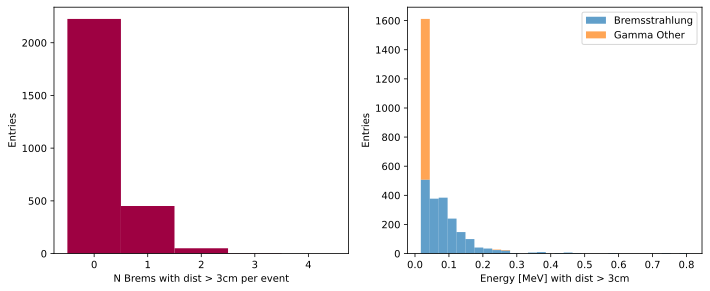

In [230]:
plt.figure(figsize=(18, 10))  # Adjust the figure size as needed

# Multiplicities
plt.subplot(2, 3, 1);
plt.hist(n_photon_v, bins = bin_edges, color=cmap(0));
plt.xlabel("N Brems with dist > 3cm per event")
plt.ylabel("Entries")
plt.xticks(bin_centers) ;

# Energies
plt.subplot(2, 3, 2);
E_brem_scale = np.full_like(E_brem, scale_factor)
E_gamma_scale = np.full_like(E_gamma, scale_factor)

plt.hist([E_brem, E_gamma], bins=30,weights=[E_brem_scale, E_gamma_scale], stacked=True, alpha=0.7, label=["Bremsstrahlung","Gamma Other"]);
plt.legend()
plt.xlabel("Energy [MeV] with dist > 3cm")
plt.ylabel("Entries")

## Plot the events in 2D and 3D 

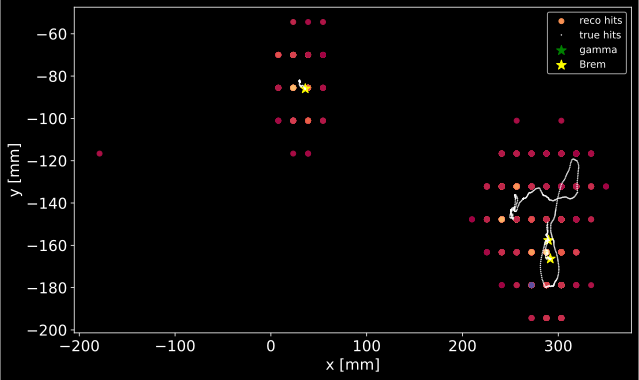

In [231]:
%matplotlib inline
# Plot a reco event
ev_id = 99

reco_event = chits_v[0][chits_v[0].event == ev_id]

event = DE_hits[DE_hits.event_id == ev_id]
event_brem = eBrem_contained[eBrem_contained.event_id == ev_id ]
event_gamma = gammas_contained[gammas_contained.event_id == ev_id ]

fig, ax  = plt.subplots(figsize=(10, 6))
fig.set_facecolor('black')
ax.set_facecolor('black')
plt.scatter(reco_event.X, reco_event.Y,c= reco_event.Ec, cmap='Spectral', s=25, label = "reco hits")
plt.plot(event.x, event.y, ".", c = "white", ms = 1, label = "true hits")
plt.scatter(event_gamma.final_x,event_gamma.final_y, color = "g", marker = "*", s = 100, label = "gamma")
plt.scatter(event_brem.final_x,event_brem.final_y, color = "yellow", marker = "*",s = 100, label = "Brem")


plt.xlabel("x [mm]", fontsize = 15)
plt.ylabel("y [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')
legend = plt.legend(facecolor = "black")
# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

In [232]:
%matplotlib widget
# Make a 3D view of the track
fig  = plt.figure(figsize=(10, 10))

# Create 3D axes
ax = fig.add_subplot(111, projection='3d')

fig.set_facecolor('black')
ax.set_facecolor('black')
ax.scatter(reco_event.X, reco_event.Y,  reco_event.Z,c= reco_event.Ec, cmap='Spectral', s=25, label = "reco hits")
plt.plot(event.x, event.y,event.z, ".", c = "white", ms = 1, label = "true hits")
ax.scatter(event_gamma.final_x,event_gamma.final_y, event_gamma.final_z, color = "g", marker = "*", s = 100, label = "gamma")
ax.scatter(event_brem.final_x,event_brem.final_y, event_brem.final_z, color = "yellow", marker = "*",s = 100, label = "Brem")


ax.set_xlabel("x [mm]", fontsize = 15)
ax.set_ylabel("y [mm]", fontsize = 15)
ax.set_zlabel("z [mm]", fontsize = 15)
plt.tick_params(axis='both', which='both', labelsize=15)  # Adjust labelsize as needed

# Set the color of the axes labels and ticks to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.zaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.tick_params(axis='z', colors='white')

# Set the color of the spines (borders) to white
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Remove background (axis)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

legend = plt.legend(facecolor = "black")

# Set the text color of the legend
for text in legend.get_texts():
    text.set_color('white')  # Set the text color to red

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

KeyError: 'default'

KeyError: 'default'

KeyError: 'default'

KeyError: 'default'

KeyError: 'default'